<a href="https://colab.research.google.com/github/MartinParafita/BotFinanciero/blob/main/ProyectoAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import os
import platform
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [17]:
df = pd.read_csv("BTCUSDT-30m-2022-07.csv")
df

,1656633600000,19942.21000000,20699.99000000,19658.97000000,20491.03000000,7279.47579000,1656635399999,145615709.42360320,85501,3915.92731000,78436635.14180450,0
0,1656635400000,20491.03,20918.35,20259.24,20295.08,7822.80378,1656637199999,1.605123e+08,97554,3953.10607,8.114685e+07,0
1,1656637200000,20295.09,20447.27,20260.00,20390.00,2931.42528,1656638999999,5.962890e+07,38649,1546.15527,3.145089e+07,0
2,1656639000000,20390.00,20475.15,20285.89,20416.46,2310.72685,1656640799999,4.712065e+07,29422,1198.41026,2.443303e+07,0
3,1656640800000,20416.45,20552.29,20353.35,20392.01,1946.11616,1656642599999,3.977379e+07,26825,974.45005,1.991252e+07,0
4,1656642600000,20392.00,20397.36,20269.95,20300.69,1722.80611,1656644399999,3.501123e+07,26199,824.92826,1.676177e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1659303000000,23763.09,23769.78,23531.61,23589.58,2163.25899,1659304799999,5.111222e+07,83358,986.05211,2.329466e+07,0
1483,1659304800000,23591.06,23593.45,23254.36,23323.61,5323.58675,1659306599999,1.247794e+08,144945,2488.94504,5.835367e+07,0
1484,1659306600000,23324.72,23392.00,23227.31,23377.48,4384.32396,1659308399999,1.021054e+08,136791,2142.19804,4.989353e+07,0
1485,1659308400000,23379.82,23381.63,23292.36,23338.08,2415.83000,1659310199999,5.636384e+07,85713,1182.71711,2.759449e+07,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   1656633600000       1487 non-null   int64  
 1   19942.21000000      1487 non-null   float64
 2   20699.99000000      1487 non-null   float64
 3   19658.97000000      1487 non-null   float64
 4   20491.03000000      1487 non-null   float64
 5   7279.47579000       1487 non-null   float64
 6   1656635399999       1487 non-null   int64  
 7   145615709.42360320  1487 non-null   float64
 8   85501               1487 non-null   int64  
 9   3915.92731000       1487 non-null   float64
 10  78436635.14180450   1487 non-null   float64
 11  0                   1487 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 139.5 KB


En las siguientes lineas de codigo les cambio el nombre a las columnas, no me dejó cambiarlas según su posición ( 0,1,2 ) sino que las columnas tenian como nombre el primer dato de la primer fila.

In [ ]:
df2 = df.copy()
df2.rename(columns={"1656633600000":"Open time", "19942.21000000":"Open price", "20699.99000000": "High", "19658.97000000": "Low", "20491.03000000":"Close price", "7279.47579000": "Volume", "1656635399999": "Close time"}, inplace=True)
df2

In [18]:
df3 = df2.drop(columns={"145615709.42360320","85501","3915.92731000","78436635.14180450","0"})
df3

,Open time,Open price,High,Low,Close price,Volume,Close time
0,1656635400000,20491.03,20918.35,20259.24,20295.08,7822.80378,1656637199999
1,1656637200000,20295.09,20447.27,20260.00,20390.00,2931.42528,1656638999999
2,1656639000000,20390.00,20475.15,20285.89,20416.46,2310.72685,1656640799999
3,1656640800000,20416.45,20552.29,20353.35,20392.01,1946.11616,1656642599999
4,1656642600000,20392.00,20397.36,20269.95,20300.69,1722.80611,1656644399999
...,...,...,...,...,...,...,...
1482,1659303000000,23763.09,23769.78,23531.61,23589.58,2163.25899,1659304799999
1483,1659304800000,23591.06,23593.45,23254.36,23323.61,5323.58675,1659306599999
1484,1659306600000,23324.72,23392.00,23227.31,23377.48,4384.32396,1659308399999
1485,1659308400000,23379.82,23381.63,23292.36,23338.08,2415.83000,1659310199999


In [83]:
# Para saber que momento exacto representa:
#dia_0 = pd.Period('1970/01/01 00:00:00', 'ms')  # Numero de Open/Close time:
#dia_0


Period('1970-01-01 00:00:00.000', 'L')

In [ ]:
cierres = df3["Close time"].apply(lambda x: pd.Period('1970/01/01 00:00:00.000') + x)
cierres

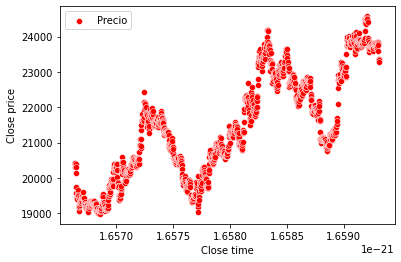

In [79]:
sns.scatterplot(x=df3['Close time'], y=df3['Close price'], color='r', label='Precio')
plt.show()

In [92]:
df3['Ganancia'] = df3.apply(lambda x: True if x["Close price"] >= x["Open price"] else False, axis=1)
df3

,Open time,Open price,High,Low,Close price,Volume,Close time,Ganancia
0,1970-01-01 00:00:00.000,20491.03,20918.35,20259.24,20295.08,7822.80378,1.656637e-21,False
1,1970-01-01 00:00:00.000,20295.09,20447.27,20260.00,20390.00,2931.42528,1.656639e-21,True
2,1970-01-01 00:00:00.000,20390.00,20475.15,20285.89,20416.46,2310.72685,1.656641e-21,True
3,1970-01-01 00:00:00.000,20416.45,20552.29,20353.35,20392.01,1946.11616,1.656643e-21,False
4,1970-01-01 00:00:00.000,20392.00,20397.36,20269.95,20300.69,1722.80611,1.656644e-21,False
...,...,...,...,...,...,...,...,...
1482,1970-01-01 00:00:00.000,23763.09,23769.78,23531.61,23589.58,2163.25899,1.659305e-21,False
1483,1970-01-01 00:00:00.000,23591.06,23593.45,23254.36,23323.61,5323.58675,1.659307e-21,False
1484,1970-01-01 00:00:00.000,23324.72,23392.00,23227.31,23377.48,4384.32396,1.659308e-21,True
1485,1970-01-01 00:00:00.000,23379.82,23381.63,23292.36,23338.08,2415.83000,1.659310e-21,False


In [95]:
X = df3['Close time'].values
y = df3['Close price'].values

In [96]:
from sklearn.model_selection import train_test_split
# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
# Ojo! Los dataset de train y test son array numpy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
from sklearn import linear_model
# Calcular y visualizar le prediccion de costos por m2
lr = linear_model.LinearRegression()
#print(y_train)
lr.fit(X_train,y_train)
y_hat= lr.predict(X_test)

ValueError: ignored